In [2]:
from __future__ import division
from math import *
import numpy as np
import sys
import os
from matplotlib.ticker import LogFormatter
from matplotlib.ticker import LogFormatterExponent
from matplotlib.ticker import LogFormatterSciNotation

import pandas as pd
import numpy as np
import matplotlib, os
import matplotlib.pyplot as plt
# Matplotlib configuration
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.style.use('classic')
plt.rcParams['xtick.direction']     = 'in'
plt.rcParams['ytick.direction']     = 'in'
plt.rcParams['xtick.top']           = True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.right']         = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import matplotlib.cm as cm

from matplotlib import pyplot
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family' : "sans-serif"})
params= {'text.latex.preamble' : [r'\usepackage{amssymb}']}
pyplot.rcParams.update(params)

from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import FuncFormatter
from scipy.interpolate import griddata
from scipy.interpolate import interp1d

In [3]:
exec(open("/Users/oozdal/packages/ExpDATA/ExDATA.py").read())

In [19]:
SeqSM_Wpxsec_LO = pd.read_csv('/Users/oozdal/projects/SSM_WpZp/data/SeqSM_Wpxsec_LO.csv', header=None, sep=" | ",engine='python')
SeqSM_Wpxsec_LO.columns = ["MZp", "xsec", "Zptotalwidth", "BRZptoee", "BRZptomumu", "BRZptoll", "upscale", "downscale", "upPDF", "downPDF", "MWp"]

AddSU2L_Wpxsec_LO = pd.read_csv('/Users/oozdal/projects/SSM_WpZp/data/AddSU2L_Wpxsec_LO.csv', header=None, sep=" | ",engine='python')
AddSU2L_Wpxsec_LO.columns = ["MZp", "xsec", "Zptotalwidth", "BRZptoee", "BRZptomumu", "BRZptoll", "upscale", "downscale", "upPDF", "downPDF", "MWp"]

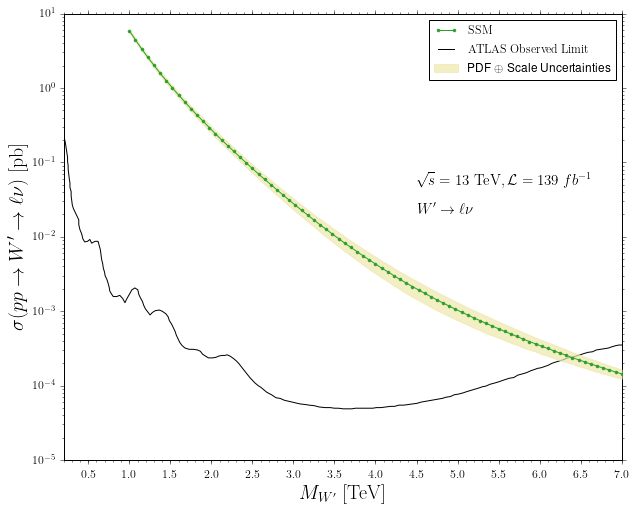

In [49]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
#cm = plt.cm.get_cmap('rainbow')
fig, ax1 = plt.subplots()
fig.set_facecolor('white')
#col = np.array(MG["width"])/np.array(MG["MZp"])

sc1 = ax1.plot(np.array(SeqSM_Wpxsec_LO["MWp"])/1000., np.array(SeqSM_Wpxsec_LO["xsec"]), c="tab:green", marker=".", zorder=50,label=r" $\rm {SSM} $ ")

totxsection   = np.array(SeqSM_Wpxsec_LO["xsec"])
uperror       = np.sqrt(np.array(SeqSM_Wpxsec_LO["upscale"]**2+SeqSM_Wpxsec_LO["upPDF"]**2))/100.
uptotxsection = totxsection + totxsection*uperror
#sc1 = ax1.plot(np.array(SeqSM_Wpxsec_LO["MZp"])/1000., uptotxsection , zorder=49, c="red")

totxsection     = np.array(SeqSM_Wpxsec_LO["xsec"])
downerror       = np.sqrt(np.array(SeqSM_Wpxsec_LO["downscale"]**2+SeqSM_Wpxsec_LO["downPDF"]**2))/100.
downtotxsection = totxsection - totxsection*uperror
#sc1 = ax1.plot(np.array(SeqSM_Wpxsec_LO["MZp"])/1000., downtotxsection , zorder=49, c="red")

sc1 = ax1.fill_between(np.array(SeqSM_Wpxsec_LO["MWp"])/1000., downtotxsection, uptotxsection, color='palegoldenrod',
                       label=r"PDF $\oplus$ Scale Uncertainties", alpha=0.7, zorder=18)

#################################### Additional SU2L ################################
#sc1 = ax1.plot(np.array(AddSU2L_Wpxsec_LO["MWp"])/1000., np.array(AddSU2L_Wpxsec_LO["xsec"]), c="tab:blue", marker=".", zorder=50,label=r" $\rm {Additional\ SU(2)_L} $ ")

#totxsection   = np.array(AddSU2L_Wpxsec_LO["xsec"])
#uperror       = np.sqrt(np.array(AddSU2L_Wpxsec_LO["upscale"]**2+AddSU2L_Wpxsec_LO["upPDF"]**2))/100.
#uptotxsection = totxsection + totxsection*uperror
#sc1 = ax1.plot(np.array(AddSU2L_Wpxsec_LO["MZp"])/1000., uptotxsection , zorder=49, c="red")

#totxsection     = np.array(AddSU2L_Wpxsec_LO["xsec"])
#downerror       = np.sqrt(np.array(AddSU2L_Wpxsec_LO["downscale"]**2+AddSU2L_Wpxsec_LO["downPDF"]**2))/100.
#downtotxsection = totxsection - totxsection*uperror
#sc1 = ax1.plot(np.array(AddSU2L_Wpxsec_LO["MZp"])/1000., downtotxsection , zorder=49, c="red")

#sc1 = ax1.fill_between(np.array(AddSU2L_Wpxsec_LO["MWp"])/1000., downtotxsection, uptotxsection, color='palegoldenrod', 
#                       label=r"PDF $\oplus$ Scale Uncertainties Additional $SU(2)_L$ ", alpha=0.7, zorder=19)


#cbar1 = plt.colorbar(sc1, format = "%.0f", extend="both")
#cbar1.set_label(r"$\displaystyle v^\prime {\rm\ SU(2)_R\ and\ BL\ SSB\ scale\ [TeV]}$", fontsize=20)

sc1 = ax1.plot(Wprimetolnu139fb["MWp"], Wprimetolnu139fb["xsec"], color='black', label=r"$ {\rm\ ATLAS\ Observed\ Limit} $", zorder = 15)
    
ax1.text(4.5, 5e-2, r"$\displaystyle \sqrt{s} = 13 {\rm\ TeV}, \mathcal{L} = 139\ fb^{-1}$", size=15)
ax1.text(4.5, 2e-2, r"$\displaystyle W^\prime \to \ell \nu $", size=15)
xmin = 0.2
xmax = 7.0
ymin = 1e-5
ymax = 1e1
ax1.axis([xmin,xmax,ymin,ymax])
plt.xlabel(r"$\displaystyle M_{W^\prime} {\rm\ [TeV]}$", fontsize=20)
plt.ylabel(r"$\displaystyle \sigma (pp \to W^\prime \to \ell \nu) {\rm\ [pb]}$", fontsize=20)
ax1.xaxis.set_major_locator(MultipleLocator(0.5))
ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
#ax1.yaxis.set_major_locator(MultipleLocator(5))
#ax1.yaxis.set_minor_locator(MultipleLocator(1))
plt.yscale('log')
# Set both ticks to be outside
ax1.tick_params(which='both', direction='out')
#plt.legend(loc='best',frameon=True)
leg = plt.legend(loc='upper right',frameon=True)
leg.set_zorder(100)
#fig.savefig("plot/Zptoll_limit_withBR_139fb.png",dpi = 300)   # save the figure to file
#plt.close(fig)

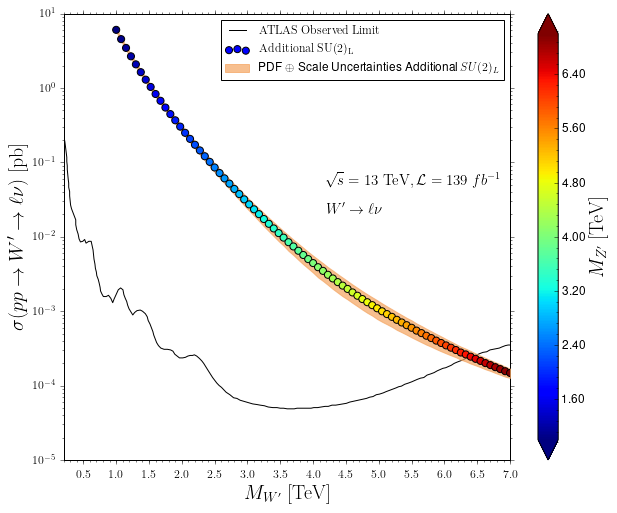

In [61]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('rainbow')
fig, ax1 = plt.subplots()
fig.set_facecolor('white')
col = np.array(AddSU2L_Wpxsec_LO["MWp"])/1000.   # MZp/MWp = 1 -> Additional SU2L
 
#################################### Additional SU2L ################################
#sc1 = ax1.plot(np.array(AddSU2L_Wpxsec_LO["MWp"])/1000., np.array(AddSU2L_Wpxsec_LO["xsec"]), c=cm, marker=".", zorder=50,label=r" $\rm {Additional\ SU(2)_L} $ ")

totxsection   = np.array(AddSU2L_Wpxsec_LO["xsec"])
uperror       = np.sqrt(np.array(AddSU2L_Wpxsec_LO["upscale"]**2+AddSU2L_Wpxsec_LO["upPDF"]**2))/100.
uptotxsection = totxsection + totxsection*uperror
##sc1 = ax1.plot(np.array(AddSU2L_Wpxsec_LO["MZp"])/1000., uptotxsection , zorder=49, c="red")

totxsection     = np.array(AddSU2L_Wpxsec_LO["xsec"])
downerror       = np.sqrt(np.array(AddSU2L_Wpxsec_LO["downscale"]**2+AddSU2L_Wpxsec_LO["downPDF"]**2))/100.
downtotxsection = totxsection - totxsection*uperror
##sc1 = ax1.plot(np.array(AddSU2L_Wpxsec_LO["MZp"])/1000., downtotxsection , zorder=49, c="red")

sc1 = ax1.scatter(np.array(AddSU2L_Wpxsec_LO["MWp"])/1000., np.array(AddSU2L_Wpxsec_LO["xsec"]), 
                  c=col, marker=".", zorder=50,label=r" $\rm {Additional\ SU(2)_L} $ ", s=200)

cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
cbar1.set_label(r"$\displaystyle M_{Z^\prime} {\rm\ [TeV]}$", fontsize=20)

sc1 = ax1.fill_between(np.array(AddSU2L_Wpxsec_LO["MWp"])/1000., downtotxsection, uptotxsection, color='sandybrown', 
                       label=r"PDF $\oplus$ Scale Uncertainties Additional $SU(2)_L$ ", alpha=0.7, zorder=19)

sc1 = ax1.plot(Wprimetolnu139fb["MWp"], Wprimetolnu139fb["xsec"], color='black', label=r"$ {\rm\ ATLAS\ Observed\ Limit} $", zorder = 15)
    
ax1.text(4.2, 5e-2, r"$\displaystyle \sqrt{s} = 13 {\rm\ TeV}, \mathcal{L} = 139\ fb^{-1}$", size=15)
ax1.text(4.2, 2e-2, r"$\displaystyle W^\prime \to \ell \nu $", size=15)
xmin = 0.2
xmax = 7.0
ymin = 1e-5
ymax = 1e1
ax1.axis([xmin,xmax,ymin,ymax])
plt.xlabel(r"$\displaystyle M_{W^\prime} {\rm\ [TeV]}$", fontsize=20)
plt.ylabel(r"$\displaystyle \sigma (pp \to W^\prime \to \ell \nu) {\rm\ [pb]}$", fontsize=20)
ax1.xaxis.set_major_locator(MultipleLocator(0.5))
ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
#ax1.yaxis.set_major_locator(MultipleLocator(5))
#ax1.yaxis.set_minor_locator(MultipleLocator(1))
plt.yscale('log')
# Set both ticks to be outside
ax1.tick_params(which='both', direction='out')
#plt.legend(loc='best',frameon=True)
leg = plt.legend(loc='upper right',frameon=True)
leg.set_zorder(100)
#fig.savefig("plot/Zptoll_limit_withBR_139fb.png",dpi = 300)   # save the figure to file
#plt.close(fig)